# Linear Regression - Data exploration and visualisation

We're at [this lesson](https://www.udemy.com/course/python-data-science-machine-learning-bootcamp/learn/lecture/7727906#questions/17197356) of our Data Science bootcamp.

### Configurations:

One of the main workcourses of data science: the pandas DataFrame. We can think about a pandas dataframe as a really powerfull spreadsheet.

Matplotlib module has graphic functionalities. The specific plotting fuctionality we'll need is "pyplot". In order to shorten our code later, we're going to create an alias for our pyplot, called "plt".

Scikit-learn is a free software ML library for Python. It features various classification, regression and clustering algorithms. We could import all of it with "import sklearn", but we'll just import the functionality of building linear regression models, as it's the only one we'll use.

In [20]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Before we continue, we'll need to install Anaconda. Follow this [Stackoverflow thread](https://stackoverflow.com/questions/59282874/how-to-install-anaconda-in-a-cgp-cloud-ai-notebook-instance-so-that-it-is-used-b).

### Explore our data:

Pandas already knows how to read CSVs. We’re accessing the CSV file functionality that pandas has through the “pandas.read_csv()” notation. Then we're creating an object to store our data through "data =".

In [21]:
data = pandas.read_csv('cost_revenue_clean.csv')

Let's have some statistics of the data we have (we apply "describe to the object we just created"):

In [22]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


Now we have all our data stored in the "data" object. Let's separate our variables out. We want to be able to create some charts and create our linear regression, so we want to be organise. Let's create one variable for our target, and one for our feature.

What type of variables we should create?

In [23]:
x = DataFrame(data, columns=['production_budget_usd'])
y = DataFrame(data, columns=['worldwide_gross_usd'])

### Visualise our data:

Let's create a **scatterplot** to visualise our data. 
- Then we'll create a title and some labels for our plot, then tell the notebook to show it to us (RUN). 
- As we think it's too little, we'll add a first line to make it larger by redefining the size (RUN).
- Pyplot leaves a bit of margin for negative values, but our Y and X axes never go below 0. We can customise our chart to just display the range we want. We do this with "ylim" and "xlim" (RUN).
- More styling: We can add transparency to the dots of our scatterplot, of our figure, by tuning the alpha value. This way we'll see where most of our dots are, and which are the outliers.
- After creating our linear regression model (step below), we can plot the predictions, and apply some styling (red color and wider line) to it (RUN)


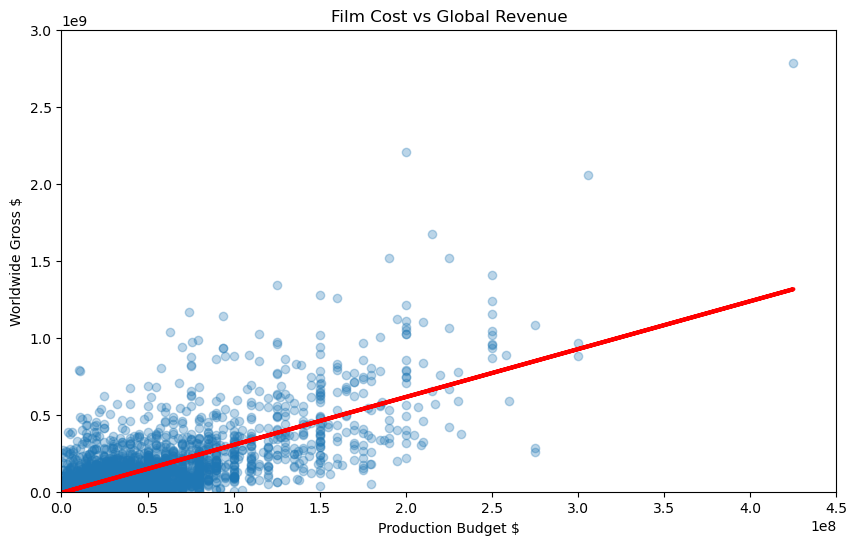

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.3)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.xlim(0,450000000)
plt.ylim(0,3000000000)
plt.plot(x,reg.predict(x),color='red',linewidth=3)
plt.show()

Train a linear regression model with our data, and store it in the "regression" object:

In [25]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

For evaluating our results, we can ask scikit-learn for the parameters of our model (slope coefficient and intercept). Don't forget the "_":

In [33]:
reg.coef_ # theta_1

array([[3.11150918]])

In [32]:
reg.intercept_ # theta_0

array([-7236192.72913958])

Interpretation:
- Theta_1 (slope) = 3.1. This means there’s a positive relationship between budget and revenue, and for each 1USD budget we should receive 3.1USD in average. This doesn't look bad in principle.
- Theta_0 is negative. This means that if we invest 0 budget we’ll lose over 7M USD. This is dramatic and not realistic. We need to accept that our model is a dramatic interpretation of reality. If we see, the model predicts much worse at the extremes.

To make predictions, we just need to substitute the thetas and the x.

Now, how can we measure how good and accurate our model? We’ll look at r^2 or Goodness of fit:

In [34]:
reg.score(x,y)

0.5496485356985729

Our simplistic model can explain about 55% of the variation of film revenues, just looking at the budgets. Not bad!
Still a lot of questions to answer: How would our model perform with more features? What if we evaluated the model not with train data, but with new one? What if the relationship is not linear? We’ll see.